In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%ls

gdrive/  sample_data/


In [3]:
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [11]:
%ls

 California_Fire_Incidents.csv   Dataset/               'Getting started.pdf'
'Colab Notebooks'/              'Earthdata Search.png'   LST.h5


In [12]:
# packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from mlxtend.plotting import ecdf # empirical CDF plot

In [14]:
df = pd.read_csv('California_Fire_Incidents.csv')
df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,10,NaN,NaN,NaN,2013-09-24T20:15:00Z,NaN,False,True,NaN,NaN,NaN,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,100.0,NaN,True,The Aspen Fire burned in July 2013 seven miles...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,33,63.0,20.0,201.0,2013-08-12T18:00:00Z,NaN,False,True,NaN,20.0,26.0,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,100.0,2106.0,True,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,Finalized,8.0,40.0,NaN,NaN

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(df.ArchiveYear, df.AcresBurned, color='blue', alpha=0.25)
plt.xlabel('Archive Year')
plt.ylabel('AcresBurned')
plt.grid()
plt.show()

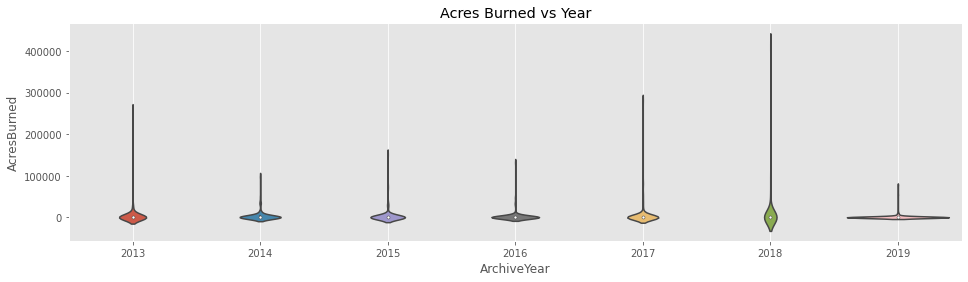

In [16]:
plt.figure(figsize=(16,4))
sns.violinplot(x='ArchiveYear', y='AcresBurned', data=df)
plt.grid()
plt.title('Acres Burned vs Year')
plt.show()

In [17]:
df['log10AcresBurned'] = np.log10(df.AcresBurned+0.1)

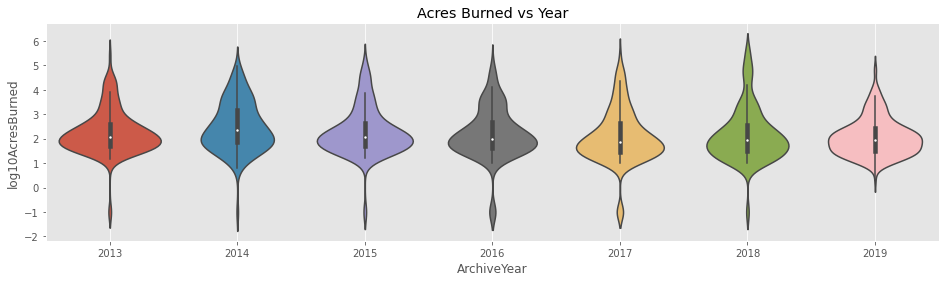

In [19]:
plt.figure(figsize=(16,4))
sns.violinplot(x='ArchiveYear', y='log10AcresBurned', data=df)
plt.grid()
plt.title('Acres Burned vs Year')
plt.show()

In [ ]:
acres_sum = df.groupby(by='ArchiveYear').AcresBurned.sum()
acres_sum
plt.scatter(acres_sum.index, acres_sum)
plt.grid()
plt.title('Acres Burned sum per year')
plt.show()

In [ ]:
plt.scatter(df.Longitude, df.Latitude)
plt.grid()
plt.show()

In [ ]:
df_select = df[df.Longitude<-115]
df_select = df_select[(df_select.Latitude<44) & (df_select.Latitude > 30)]
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

Outlier Lon/Lat: 113   -116.61
Name: Longitude, dtype: float64 113    38.838
Name: Latitude, dtype: float64


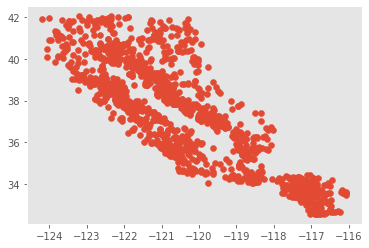

In [23]:
outlier = df_select[df_select.CanonicalUrl=='/incidents/2013/8/6/tram-fire/']
print('Outlier Lon/Lat:', outlier.Longitude, outlier.Latitude)
df_select = df_select[df_select.CanonicalUrl!='/incidents/2013/8/6/tram-fire/']
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

In [27]:
zoom_factor = 8 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df_select.shape[0]):
   folium.Circle(
      location=[df_select.iloc[i]['Latitude'], df_select.iloc[i]['Longitude']],
      radius=np.sqrt(df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + df_select.iloc[i]['CanonicalUrl'] + ' - Year:' + str(int(df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(df_select.iloc[i]['AcresBurned']),
      fill=True,
      fill_color='red'
   ).add_to(my_map_1)

my_map_1 # display

In [25]:
my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)
HeatMap(data=df_select[['Latitude', 'Longitude']], radius=10).add_to(my_map_2)

my_map_2

RecursionError: ignored

In [ ]:
df_select_2018 = df_select[df_select.ArchiveYear==2018]

In [ ]:
zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df_select_2018.shape[0]):
   folium.Circle(
      location=[df_select_2018.iloc[i]['Latitude'], df_select_2018.iloc[i]['Longitude']],
      radius=np.sqrt(df_select_2018.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + df_select_2018.iloc[i]['CanonicalUrl'] + ' - Year:' + str(int(df_select_2018.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(df_select_2018.iloc[i]['AcresBurned']),
      fill=True,
      fill_color='red'
   ).add_to(my_map_2)
my_map_2